In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Membaca gambar
image = cv2.imread('fotoinna.jpg')

In [4]:
# Konversi gambar ke grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


In [5]:
def mean_filter(image, kernel_size):
    # Mendapatkan dimensi gambar
    h, w = image.shape
    
    # Membuat padding untuk gambar
    pad_size = kernel_size // 2
    padded_image = cv2.copyMakeBorder(image, pad_size, pad_size, pad_size, pad_size, cv2.BORDER_CONSTANT, value=0)
    
    # Membuat hasil gambar kosong
    mean_filtered = np.zeros_like(image)
    
    # Melakukan mean filtering
    for i in range(h):
        for j in range(w):
            # Mengambil nilai dari kernel
            kernel = padded_image[i:i+kernel_size, j:j+kernel_size]
            mean_value = np.mean(kernel)
            mean_filtered[i, j] = mean_value
    
    return mean_filtered

In [6]:
# Median Filtering
median_filtered = cv2.medianBlur(image, 5)


In [7]:
# Mean Filtering dengan kernel size 5
mean_filtered = mean_filter(gray_image, 5)

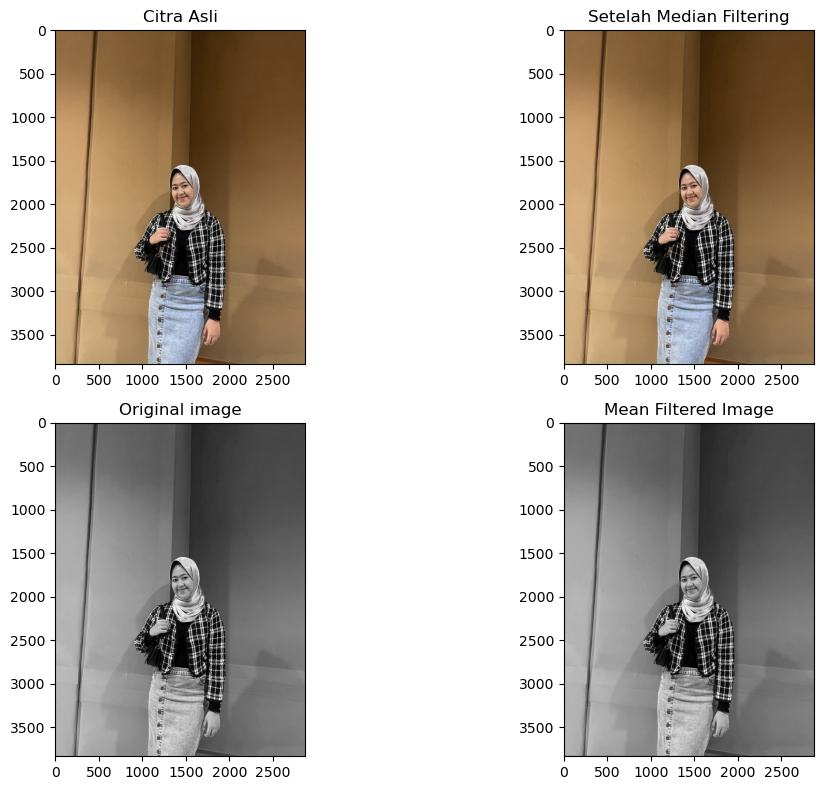

In [26]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Citra Asli')
plt.axis('on')

plt.subplot(2, 2, 2)
plt.imshow(cv2.cvtColor(median_filtered, cv2.COLOR_BGR2RGB))
plt.title('Setelah Median Filtering')
plt.axis('on')

plt.subplot(2, 2, 3)
plt.imshow(gray_image, cmap='gray')
plt.title('Original image')
plt.axis('on')

plt.subplot(2, 2, 4)
plt.imshow(mean_filtered, cmap='gray')
plt.title('Mean Filtered Image')
plt.axis('on')

plt.tight_layout()
plt.show()